In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data
df = pd.read_csv('./../data/yellowTripData.csv').drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'tolls_amount', 'improvement_surcharge', 'total_amount'], axis=1)

In [4]:
df

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount
0,2,1,1.59,-73.993896,40.750111,1,-73.974785,40.750618,1,12.0,1.0,0.5,3.25
1,1,1,3.30,-74.001648,40.724243,1,-73.994415,40.759109,1,14.5,0.5,0.5,2.00
2,1,1,1.80,-73.963341,40.802788,1,-73.951820,40.824413,2,9.5,0.5,0.5,0.00
3,1,1,0.50,-74.009087,40.713818,1,-74.004326,40.719986,2,3.5,0.5,0.5,0.00
4,1,1,3.00,-73.971176,40.762428,1,-74.004181,40.742653,2,15.0,0.5,0.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748981,1,2,1.00,-73.951988,40.786217,1,-73.953735,40.775162,1,5.5,0.0,0.5,1.25
12748982,1,2,0.80,-73.982742,40.728184,1,-73.974976,40.720013,1,6.0,0.0,0.5,2.00
12748983,1,1,3.40,-73.979324,40.749550,1,-73.969101,40.787800,2,13.5,0.0,0.5,0.00
12748984,1,1,1.30,-73.999565,40.738483,1,-73.981819,40.737652,1,10.5,0.0,0.5,2.25


In [ ]:
# df = df.sample(1274898)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274898 entries, 3416252 to 1565161
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   VendorID           1274898 non-null  int64  
 1   passenger_count    1274898 non-null  int64  
 2   trip_distance      1274898 non-null  float64
 3   pickup_longitude   1274898 non-null  float64
 4   pickup_latitude    1274898 non-null  float64
 5   RateCodeID         1274898 non-null  int64  
 6   dropoff_longitude  1274898 non-null  float64
 7   dropoff_latitude   1274898 non-null  float64
 8   payment_type       1274898 non-null  int64  
 9   fare_amount        1274898 non-null  float64
 10  extra              1274898 non-null  float64
 11  mta_tax            1274898 non-null  float64
 12  tip_amount         1274898 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 136.2 MB


In [7]:
correlations = df.corr()['tip_amount'].drop('tip_amount')
correlations

VendorID             0.000846
passenger_count     -0.000458
trip_distance       -0.000001
pickup_longitude    -0.000120
pickup_latitude      0.000116
RateCodeID           0.000025
dropoff_longitude   -0.000116
dropoff_latitude     0.000111
payment_type        -0.001029
fare_amount          0.001188
extra               -0.000703
mta_tax             -0.000021
Name: tip_amount, dtype: float64

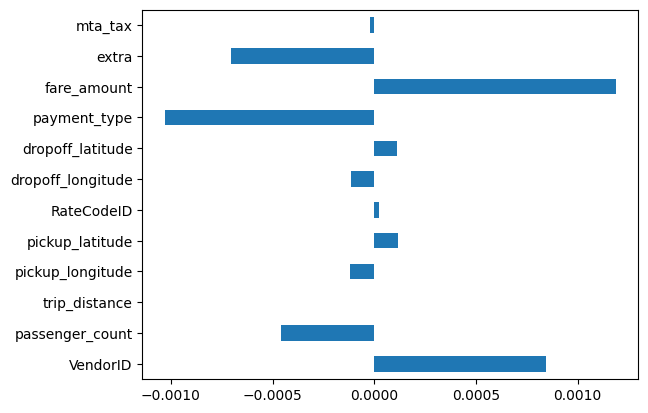

In [8]:
correlations.plot(kind='barh')
plt.show()


In [9]:
X = df.drop(['tip_amount'], axis=1).values
y = df['tip_amount'].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor

criterion = 'squared_error'
max_depth = 10
model = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

Mean Squared Error: 61209319.361506976
R^2: -12082108.703745035
